<a href="https://colab.research.google.com/github/keithferns98/TimeSeriesAnalysis/blob/main/Forecast(GEStock)Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [2]:
df=pd.read_csv('GE.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,83.360001,87.599998,83.360001,87.440002,86.789612,12222500
1,2019-11-05,87.360001,87.760002,85.760002,87.760002,87.107239,8922713
2,2019-11-06,87.440002,88.800003,86.320000,88.160004,87.504265,9750288
3,2019-11-07,88.800003,90.559998,88.720001,90.320000,89.648193,8885288
4,2019-11-08,89.839996,92.400002,89.120003,92.160004,91.474510,7810075


In [39]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2020-10-28,60.080002,62.880001,59.279999,59.360001,59.216675,31686763
249,2020-10-29,61.279999,61.919998,58.480000,58.959999,58.817642,15412250
250,2020-10-30,58.720001,60.320000,58.320000,59.360001,59.216675,12796263
251,2020-11-02,60.000000,60.639999,58.639999,60.160000,60.014744,13609788
252,2020-11-03,61.200001,63.360001,60.320000,62.799999,62.648369,12234063


In [30]:
df.columns
df.shape

(253, 7)

In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
train_dates=pd.to_datetime(df['Date'])


In [8]:
train_dates.head()

0   2019-11-04
1   2019-11-05
2   2019-11-06
3   2019-11-07
4   2019-11-08
Name: Date, dtype: datetime64[ns]

In [12]:
cols=list(df)[1:6]

In [14]:
df_for_train=df[cols].astype(float)

In [16]:
df_for_train.head()

,Open,High,Low,Close,Adj Close
0,83.360001,87.599998,83.360001,87.440002,86.789612
1,87.360001,87.760002,85.760002,87.760002,87.107239
2,87.440002,88.800003,86.320000,88.160004,87.504265
3,88.800003,90.559998,88.720001,90.320000,89.648193
4,89.839996,92.400002,89.120003,92.160004,91.474510


In [18]:
scaler=StandardScaler()
scaler=scaler.fit(df_for_train)
df_for_train_scaled=scaler.transform(df_for_train)

In [19]:
trainX=[]
trainY=[]

In [21]:
n_future=1
n_past=14

In [24]:
for i in range(n_past, len(df_for_train_scaled) - n_future +1):
    trainX.append(df_for_train_scaled[i - n_past:i, 0:df_for_train.shape[1]])
    trainY.append(df_for_train_scaled[i + n_future - 1:i + n_future, 0])

In [25]:
trainX

[array([[0.85165369, 1.0092314 , 0.92468374, 1.07369964, 1.06968223],
        [1.06418069, 1.0177227 , 1.05205161, 1.09065076, 1.08667538],
        [1.06843128, 1.07291484, 1.08177066, 1.11183977, 1.10791639],
        [1.14069051, 1.16631657, 1.20913854, 1.22625964, 1.2226172 ],
        [1.19594716, 1.26396432, 1.23036662, 1.32372881, 1.32032572],
        [1.26820639, 1.24273649, 1.27282229, 1.25168648, 1.24810651],
        [1.23420212, 1.27670079, 1.29405037, 1.28135084, 1.27784327],
        [1.22145061, 1.1832987 , 1.24734894, 1.22625964, 1.2226172 ],
        [1.17469478, 1.17905347, 1.24734894, 1.22625964, 1.2226172 ],
        [1.24270336, 1.26396432, 1.31103269, 1.32372881, 1.32032572],
        [1.27245703, 1.24273649, 1.31103269, 1.28982619, 1.28634029],
        [1.28095827, 1.26396432, 1.28131369, 1.31525304, 1.31182955],
        [1.28520855, 1.23849083, 1.28131369, 1.26863761, 1.26509885],
        [1.23845271, 1.29368297, 1.30254172, 1.32796627, 1.32457402]]),
 array([[1.0641806

In [27]:
trainX,trainY=np.array(trainX),np.array(trainY)

In [28]:
trainX

array([[[ 0.85165369,  1.0092314 ,  0.92468374,  1.07369964,
          1.06968223],
        [ 1.06418069,  1.0177227 ,  1.05205161,  1.09065076,
          1.08667538],
        [ 1.06843128,  1.07291484,  1.08177066,  1.11183977,
          1.10791639],
        ...,
        [ 1.28095827,  1.26396432,  1.28131369,  1.31525304,
          1.31182955],
        [ 1.28520855,  1.23849083,  1.28131369,  1.26863761,
          1.26509885],
        [ 1.23845271,  1.29368297,  1.30254172,  1.32796627,
          1.32457402]],

       [[ 1.06418069,  1.0177227 ,  1.05205161,  1.09065076,
          1.08667538],
        [ 1.06843128,  1.07291484,  1.08177066,  1.11183977,
          1.10791639],
        [ 1.14069051,  1.16631657,  1.20913854,  1.22625964,
          1.2226172 ],
        ...,
        [ 1.28520855,  1.23849083,  1.28131369,  1.26863761,
          1.26509885],
        [ 1.23845271,  1.29368297,  1.30254172,  1.32796627,
          1.32457402],
        [ 1.3064613 ,  1.33613858,  1.37896215, 

In [29]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (239, 14, 5).
trainY shape == (239, 1).


In [31]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 14, 64)            17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
14/14 [==============================] - 0s 16ms/step - loss: 0.0643 - val_loss: 0.0226
Epoch 2/5
14/14 [==============================] - 0s 14ms/step - loss: 0.0552 - val_loss: 0.0121
Epoch 3/5
14/14 [==============================] - 0s 13ms/step - loss: 0.0643 - val_loss: 0.0194
Epoch 4/5
14/14 [==============================] - 0s 14ms/step - loss: 0.0646 - val_loss: 0.0119
Epoch 5/5
14/14 [==============================] - 0s 13ms/step - loss: 0.0577 - val_loss: 0.0160


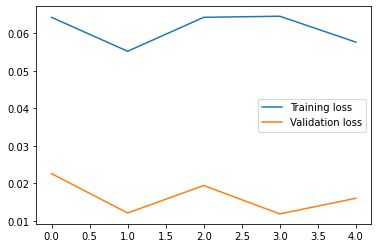

In [36]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [38]:
n_future=90
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_future, freq='1d').tolist()
print(predict_period_dates)

[Timestamp('2020-11-03 00:00:00', freq='D'), Timestamp('2020-11-04 00:00:00', freq='D'), Timestamp('2020-11-05 00:00:00', freq='D'), Timestamp('2020-11-06 00:00:00', freq='D'), Timestamp('2020-11-07 00:00:00', freq='D'), Timestamp('2020-11-08 00:00:00', freq='D'), Timestamp('2020-11-09 00:00:00', freq='D'), Timestamp('2020-11-10 00:00:00', freq='D'), Timestamp('2020-11-11 00:00:00', freq='D'), Timestamp('2020-11-12 00:00:00', freq='D'), Timestamp('2020-11-13 00:00:00', freq='D'), Timestamp('2020-11-14 00:00:00', freq='D'), Timestamp('2020-11-15 00:00:00', freq='D'), Timestamp('2020-11-16 00:00:00', freq='D'), Timestamp('2020-11-17 00:00:00', freq='D'), Timestamp('2020-11-18 00:00:00', freq='D'), Timestamp('2020-11-19 00:00:00', freq='D'), Timestamp('2020-11-20 00:00:00', freq='D'), Timestamp('2020-11-21 00:00:00', freq='D'), Timestamp('2020-11-22 00:00:00', freq='D'), Timestamp('2020-11-23 00:00:00', freq='D'), Timestamp('2020-11-24 00:00:00', freq='D'), Timestamp('2020-11-25 00:00:00'

In [40]:
forecast=model.predict(trainX[-n_future:])

In [41]:
forecast

array([[-0.6375002 ],
       [-0.66457367],
       [-0.67939055],
       [-0.68479866],
       [-0.6829911 ],
       [-0.67129153],
       [-0.66814727],
       [-0.66513044],
       [-0.6725332 ],
       [-0.6827201 ],
       [-0.6895196 ],
       [-0.69067866],
       [-0.67082936],
       [-0.651555  ],
       [-0.6332816 ],
       [-0.62526304],
       [-0.6160889 ],
       [-0.60927516],
       [-0.60291964],
       [-0.60402423],
       [-0.61698526],
       [-0.62738085],
       [-0.64259285],
       [-0.6784443 ],
       [-0.72824514],
       [-0.7785687 ],
       [-0.82197374],
       [-0.84431833],
       [-0.85610735],
       [-0.8579919 ],
       [-0.8407934 ],
       [-0.80704653],
       [-0.775948  ],
       [-0.756627  ],
       [-0.74412924],
       [-0.74115676],
       [-0.7465044 ],
       [-0.75813633],
       [-0.7806034 ],
       [-0.8024055 ],
       [-0.80597633],
       [-0.79919606],
       [-0.7941792 ],
       [-0.7894253 ],
       [-0.78158957],
       [-0

In [43]:
prediction_copies = np.repeat(forecast, df_for_train.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [44]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


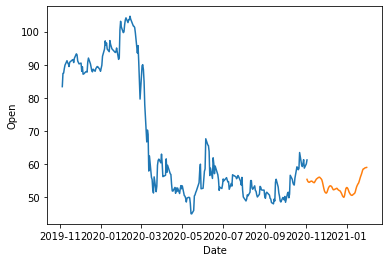

In [45]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
#original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])